## Social Network Analysis

### Social Network Analysis

Social network analysis is a method by which one can analyze the connections across individuals or groups or institutions. That is, it allows us to examine how entities are interrelated. In this ICE, we will look at a few important important steps of social network analysis.

First, let's revisit a couple of important concepts

+ Node/Vertex:  Entities in the network, and can hold self-properties (such as weight, size, position and any other attribute)
+ Edge/Link/Tie/Arc: Connections between the nodes, and might hold properties as well (such as weight representing the strength of the connection, direction in case of asymmetric relation or time if applicable)
+ Graph/network: A collection of vertices (or nodes) and edges (or ties), denoted g(V,E), where V is the vertex set and E is the edge set.
+ Undirected network: Undirected networks have edges that do not have a direction. The edges indicate a two-way relationship (i.e., the relationship is symetric), in that each edge can be traversed in both directions.
+ Directed network: Directed networks have edges with direction. The edges indicate a one-way relationship, in that each edge can only be traversed in a single direction.
+ Degree: The number of links to other nodes in the network.

### SNA Data Preparation

There are three ways to store SNA data: (a) node and edge list, (b) adjacency matrix, and (c) adjacency list (see the figure below).

Node and edge list is a most widely used way of storing SNA data. You will have a list of nodes and a list of edge pairs. Notice that you may not need the node list if you don't have "orphan" nodes -- meaning the nodes are not connected to any other nodes (the example in the figure below).

Adjacency matrix is also very commonly use. Instead of having two tables, you just need one big matrix.

Adjacency list is easy to interpret for human eyes but it is less used because it is "untidy".

### Visualizing Our 4050 Class with Python

We are going to use networkx module for the social network analysis

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Visualizing the network

The data we are going to use is peopleSNAno4050.csv. I have removed the 4050 course from everybody's list because everyone are taking this course, which makes the network very well-connected. Note here, the regular read_csv is using a new parameter called index_col = 0 because we need the first column to be row names. This is an adjacency matrix for undirected graph, so we are calling Graph() to create the social network. Depending on the graph type and how the data is stored, you will need different functions in networkx.

In [2]:
SNAdata = pd.read_csv("ICE8_Data.csv", index_col = 0)
G = nx.Graph(SNAdata)

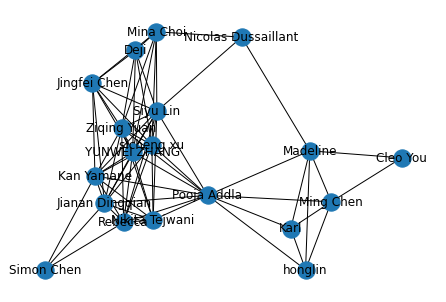

In [3]:
nx.draw(G, with_labels = True)

### Network Statistics

#### Density

The first statistic we will look at is the density. This is a measure of how complete the graph is (how many edges are present in the network as compared to the total possible number of edges).

In [4]:
density = nx.density(G)

print('The edge density is: %.3f' % (density)) 
### Here I am using a format for the output decimal places
### See tutorial here: https://www.geeksforgeeks.org/python-output-formatting/

The edge density is: 0.415


This value of 0.415 indicates that this network is quite well-connected because we can see more than 40% links among all possible links. This is going to be harder and harder as the network size gets bigger.

#### Degree Centrality

This is a common centrality measure, which gives an idea of how 'imporant' each node is in the network. The assumption is that nodes with the most edges are the most important/central as they are directly connected to lots of other nodes. Nodes with a high centrality might be expected to play important roles in network. networkx can get the degree centrality very easily. Just call the degree() in a networkx object, you will get a dictionary-like object.

For directed networks, you can calculate the in-degree centrality and out-degree centrality respectively with in_degree_centrality() and out_degree_centrality().

In [5]:
degree = nx.degree(G)
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

An easy way to visualize the dictionary is to convert it into a pandas dataframe with from_dict().

In [6]:
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


#### Closeness Centrality

Closeness centrality measures "how quickly" a node can travel to the rest of the graph.

In [7]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index') ## closeness_centrality returns a dictionary in a different way compared to degree()
                                                ## Therefore, we need to specify the orientation, otherwise Python will complain. See here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
                                                ## And discussion here: https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


#### Betweenness centrality

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates unweighted shortest paths between all pairs of nodes in a graph. We are using betweenness_centrality() to calculate this metric.

In [8]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


#### Community detection

Then let's take a look at the network structure through community detection. This method is very similar to clustering algorithm, which we have seen a few weeks ago. In a social network this is the idea that a large network can be broken down into smaller communinities/cliques. For example, if the network represents the social relationships of all the students at a school, a community/clique would be a friendship group.

There are many ways to approach community detection in networks. I am not going to go into the maths in too much detail but we are going to choose a modularity optimisation method -- greedy modularity maximization. Modularity is a measure of the extent to which like is connected to like in a network. The algorithm we will chose is already implemented for us in networkx, which makes its implementation very easy! Read more about different ways to cluster in networkx documentation: https://networkx.org/documentation/stable/reference/algorithms/community.html

The code below calls greedy_modularity_communities() to run the Clauset-Newman-Moore greedy modularity maximization. Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists. We can put the result into a list and see how many communties we have detected.

In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

3


We then can select each communities and print out the members.

In [10]:
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

['Deji', 'Jingfei Chen', 'Mina Choi', 'Nicolas Dussaillant', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']
['Jianan Dingqian', 'Kan Yamane', 'Nikita Tejwani', 'Rebecca', 'Simon Chen']


Let's get take a look a how to print out the results briefly.

We were using nx.draw() to print out a quick and dirty network, but if you want to draw prettier graphs, you will need to use other functions to plot the network layer by layer.

So first thing is to obtain the positions of each node through spring_layout(). This is just one way of layout. There are a lot of other layout options. Here are a list of different available layout in networkx: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

Then, we will plot each community seperately for different colors.

Also don't forget to plot the edges as well as the labels of the graph.

Finally, use plt.show() to supress the networkx outputs.

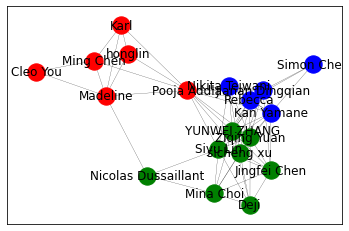

In [11]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_2, node_color='blue', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

### Make Your Network Prettier

Next, we are going to play with some network attributes to make our network prettier. Besides the coloring and layout we have shown previously, we can manipulate the size and transparency of the nodes and edges.

For example, for node, we can do a node size by degree, since we already have the degree variable. Note here, we are multiplying the degree by 50 times so that it is decently large (this is done in a loop). You can also try different ways including non-linear transformation. The default size of a networkx node is 300. Also the degree is processed by dict() to make it a real dictionary object.

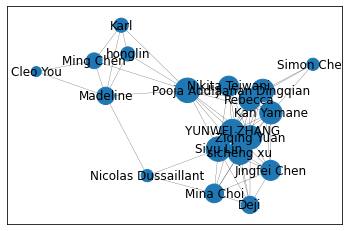

In [12]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

We can also try similar things with edges. Edge can be changed depending on the weight on it. Since this is a weighted graph, we can obtain the weight of each edge through get_edge_attributes(). Again this is a dictionary object. In addition, we are making the width of the edge as 5weight/10, so you can actually see the difference clearly.

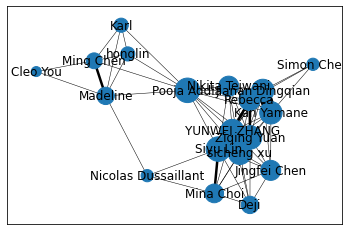

In [13]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

Now let's put everything together.

the tricky thing here is we need to specify each community's color and also change the node size at the same time. Therefore, we need to first create three dictionaries corresponding to each community from the degree dictionary. And then pass the information to the node size.

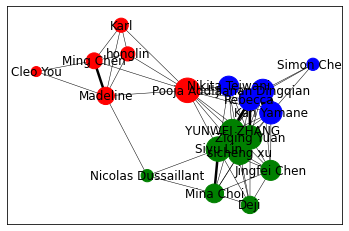

In [14]:
# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}
community_2_degree = {c: dict(degree)[c] for c in community_2}


# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='red', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_2,
                       node_size = [v * 50 for v in community_2_degree.values()],
                       node_color='blue', label = True)

# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()